In [324]:
import os
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)
import numpy as np
import datetime
import matplotlib.pyplot as plt

cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))
df = pd.read_csv('./data/metro_CA_2011_2018_lagged.csv', index_col = None)
# change year format to datetime
df["year"]= pd.to_datetime(df["year"], format = "%Y").dt.year
df.sort_values("year", ignore_index = True, inplace = True)
df.tail(10)

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,

In [325]:
targets = ["rent_in_1y","rent_in_2y","rent_in_3y","rent_in_4y","rent_in_5y"]
targets = df[targets]
targets.head()
zipcode = df['zipcode']

In [289]:
dem = [ 'not_us_citizen_pop',
        'median_age',
        'amerindian_including_hispanic',
        'amerindian_pop', 
        'asian_including_hispanic',
        'asian_male_45_54',
        'asian_male_55_64',
        'asian_pop',
        'black_including_hispanic',
         'black_male_45_54',
         'black_male_55_64',
         'black_pop',
         'white_including_hispanic',
         'white_male_45_54',
         'white_male_55_64',
         'white_pop',
           'female_10_to_14',
         'female_15_to_17',
         'female_18_to_19',
         'female_20',
        'female_21',
         'female_22_to_24',
         'female_25_to_29',
         'female_30_to_34',
         'female_35_to_39',
         'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_5_to_9',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
       'female_pop',
 'female_under_5',
       'hispanic_any_race',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
       'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_45_to_64',
 'male_50_to_54',
 'male_55_to_59',
 'male_5_to_9',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'male_pop',
 'male_under_5',
  'not_hispanic_pop',
  'other_race_pop',
       'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
       'population_1_year_and_over',
 'population_3_years_over',
   'two_or_more_races_pop',
     'total_pop'       
      ]
commute = ['no_car',
 'no_cars',
     'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
    'four_more_cars',
            'one_car',
           'three_cars',
 'two_cars',
 'walked_to_work',
           'aggregate_travel_time_to_work',
]
occ = ['not_in_labor_force',
       'pop_in_labor_force',
       'unemployed_pop',
    'armed_forces',
       'civilian_labor_force',
       'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_pop',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
       'employed_wholesale_trade',
       'employed_transportation_warehousing_utilities',
       'graduate_professional_degree',
       'management_business_sci_arts_employed',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
  'sales_office_employed',
       'worked_at_home',
 'workers_16_and_over', 
      ]
ed = ['associates_degree',
      'bachelors_degree',
      'bachelors_degree_or_higher_25_64',
      'group_quarters',
      'high_school_diploma',
      'high_school_including_ged',
      'masters_degree',
      'one_year_more_college',
      'some_college_and_associates_degree',
       'male_45_64_associates_degree',
         'male_45_64_bachelors_degree',
         'male_45_64_grade_9_12',
         'male_45_64_graduate_degree',
         'male_45_64_high_school',
        'male_45_64_less_than_9_grade',
         'male_45_64_some_college',
      'in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
 'in_school',
 'in_undergrad_college',
       'less_one_year_college',
 'less_than_high_school_graduate',
      ]
income = ['year',
          'median_income',
          'percent_income_spent_on_rent',
          'pop_determined_poverty_status',
          'poverty',
          'rent_10_to_15_percent',
 'rent_15_to_20_percent',
 'rent_20_to_25_percent',
 'rent_25_to_30_percent',
 'rent_30_to_35_percent',
 'rent_35_to_40_percent',
 'rent_40_to_50_percent',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_under_10_percent',
'renter_occupied_housing_units_paying_cash_median_gross_rent',
          'income_100000_124999',
 'income_10000_14999',
 'income_125000_149999',
 'income_150000_199999',
 'income_15000_19999',
 'income_200000_or_more',
 'income_20000_24999',
 'income_25000_29999',
 'income_30000_34999',
 'income_35000_39999',
 'income_40000_44999',
 'income_45000_49999',
 'income_50000_59999',
 'income_60000_74999',
 'income_75000_99999',
 'income_less_10000',
 'income_per_capita',
]
ar = ['avg_rent',
       'median_rent',
    'vacant_housing_units',
     'vacant_housing_units_for_rent',
     'vacant_housing_units_for_sale'
]
hh = [ 'married_households',
      'pop_divorced',
      'children',
      'children_in_single_female_hh',
      'families_with_young_children',
      'family_households',
      'father_in_labor_force_one_parent_families_with_young_children',
      'father_one_parent_families_with_young_children',
      'female_female_households',
       'male_male_households',
      'nonfamily_households',
  'one_parent_families_with_young_children',
 'pop_never_married',
 'pop_now_married',
 'pop_separated',
 'pop_widowed',
  'two_parent_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_not_in_labor_force_families_with_young_children',
      'households',
 'households_public_asst_or_food_stamps',
 'households_retirement_income',
 'housing_built_1939_or_earlier',
 'housing_built_2000_to_2004',
 'housing_built_2005_or_later',
 'housing_units',
 'housing_units_renter_occupied',
      'speak_only_english_at_home',
 'speak_spanish_at_home',
 'speak_spanish_at_home_low_english',
     ]
mig = ['different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
      'gini_index'
      ]
dwell = [
    'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_units',
 'dwellings_50_or_more_units',
 'dwellings_5_to_9_units',
     'median_year_structure_built',
 'million_dollar_housing_units',
 'mobile_homes',
 'mortgaged_housing_units',
    'occupied_housing_units',
    'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
    'owner_occupied_housing_units'
]

In [66]:
#set(df.columns)-set(dem+commute+occ+ed+income+ar+hh+mig+dwell)

In [290]:
dem = df[dem]
commute = df[commute]
occ = df[occ]
ed = df[ed]
income = df[income]
hh = df[hh]
mig = df[mig]
dwell = df[dwell]
ar = df[ar]
target = df['rent_in_1y']

In [291]:
#female_age groups 
dem['female_19_under'] = dem['female_under_5']+\
                                  dem['female_5_to_9']+\
                                  dem['female_10_to_14']+\
                                  dem['female_15_to_17']+\
                                  dem['female_18_to_19']

dem['female_20_to_29'] = dem['female_20']+\
                                  dem['female_21']+\
                                  dem['female_22_to_24']+\
                                  dem['female_25_to_29']

dem['female_30_to_39'] = dem['female_30_to_34']+\
                                  dem['female_35_to_39']

dem['female_40_to_64'] = dem['female_40_to_44']+\
                                  dem['female_45_to_49']+\
                                  dem['female_50_to_54']+\
                                  dem['female_55_to_59']+\
                                  dem['female_60_to_61']+\
                                  dem['female_62_to_64']

dem['female_64_over'] =  dem['female_65_to_66']+\
                                  dem['female_67_to_69']+\
                                  dem['female_70_to_74']+\
                                  dem['female_75_to_79']+\
                                  dem['female_80_to_84']+\
                                  dem['female_85_and_over']

dem = dem.drop(columns = ['female_under_5','female_5_to_9',
                                            'female_10_to_14','female_15_to_17',
                                            'female_18_to_19','female_20',
                                            'female_21','female_22_to_24',
                                            'female_25_to_29','female_30_to_34',
                                            'female_35_to_39','female_40_to_44',
                                            'female_45_to_49','female_50_to_54',
                                            'female_55_to_59','female_60_to_61',
                                            'female_62_to_64','female_65_to_66',
                                            'female_67_to_69','female_70_to_74',
                                            'female_75_to_79','female_80_to_84',
                                            'female_85_and_over','female_pop'])

<ipython-input-291-70314b93a5f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['female_19_under'] = dem['female_under_5']+\
<ipython-input-291-70314b93a5f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['female_20_to_29'] = dem['female_20']+\
<ipython-input-291-70314b93a5f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [292]:
#male_age groups
dem['male_19_under'] = dem['male_under_5']+\
                                dem['male_5_to_9']+\
                                dem['male_10_to_14']+\
                                dem['male_15_to_17']+\
                                dem['male_18_to_19']

dem['male_20_to_29'] = dem['male_20']+\
                                dem['male_21']+\
                                dem['male_22_to_24']+\
                                dem['male_25_to_29']

dem['male_30_to_39'] = dem['male_30_to_34']+\
                                dem['male_35_to_39']

dem['male_40_to_64'] = dem['male_40_to_44']+\
                                dem['male_45_to_49']+\
                                dem['male_50_to_54']+\
                                dem['male_55_to_59']+\
                                dem['male_60_61']+\
                                dem['male_62_64']

dem['male_64_over'] =  dem['male_65_to_66']+\
                                dem['male_67_to_69']+\
                                dem['male_70_to_74']+\
                                dem['male_75_to_79']+\
                                dem['male_80_to_84']+\
                                dem['male_85_and_over']

dem = dem.drop(columns = ['male_under_5','male_5_to_9',
                                            'male_10_to_14','male_15_to_17',
                                            'male_18_to_19','male_20',
                                            'male_21','male_22_to_24',
                                            'male_25_to_29','male_30_to_34',
                                            'male_35_to_39','male_40_to_44',
                                            'male_45_to_49','male_50_to_54',
                                            'male_55_to_59','male_60_61',
                                            'male_62_64','male_65_to_66',
                                            'male_67_to_69','male_70_to_74',
                                            'male_75_to_79','male_80_to_84',
                                            'male_85_and_over','male_pop'                         
                         ])
# Removing redundant ethnic variables
dem = dem.drop(columns = ['amerindian_including_hispanic','asian_including_hispanic',
                                            'black_including_hispanic','not_hispanic_pop',
                                            'two_or_more_races_pop','white_including_hispanic',
                                            'hispanic_any_race'])
# dem["black_pct"] = dem[""]/dem['total_pop']
# dem["asian_pct"] = dem[""]/dem['total_pop']

In [273]:
len(list(dem.columns))
list(dem.columns)

['not_us_citizen_pop',
 'median_age',
 'amerindian_pop',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'white_male_45_54',
 'white_male_55_64',
 'white_pop',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
 'male_45_to_64',
 'other_race_pop',
 'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
 'population_1_year_and_over',
 'population_3_years_over',
 'total_pop',
 'female_19_under',
 'female_20_to_29',
 'female_30_to_39',
 'female_40_to_64',
 'female_64_over',
 'male_19_under',
 'male_20_to_29',
 'male_30_to_39',
 'male_40_to_64',
 'male_64_over']

In [293]:
commute['commute_30_mins_less'] = commute['commute_less_10_mins']+\
                                       commute['commute_10_14_mins']+\
                                       commute['commute_15_19_mins']+\
                                       commute['commute_20_24_mins']+\
                                       commute['commute_25_29_mins']

commute['commute_30_to_59'] = commute['commute_30_34_mins']+\
                                   commute['commute_35_39_mins']+\
                                   commute['commute_40_44_mins']+\
                                   commute['commute_45_59_mins']

commute = commute.drop(columns = ['commute_5_9_mins','commute_less_10_mins',
                                            'commute_15_19_mins','commute_20_24_mins',
                                            'commute_25_29_mins','commute_30_34_mins',
                                            'commute_35_39_mins','commute_35_44_mins',
                                            'commute_40_44_mins','commute_45_59_mins',
                                            'commute_60_89_mins','commute_90_more_mins',
                                            'commute_10_14_mins'])
#drop redundant commuting variables
commute = commute.drop(columns = ['commuters_by_bus','commuters_by_car_truck_van',
                                            'commuters_by_carpool','commuters_by_subway_or_elevated',
                                            'commuters_drove_alone','no_car','no_cars','one_car',
                                            'two_cars','three_cars','four_more_cars',
                                            'aggregate_travel_time_to_work'])

<ipython-input-293-e69b1e44538f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute['commute_30_mins_less'] = commute['commute_less_10_mins']+\
<ipython-input-293-e69b1e44538f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute['commute_30_to_59'] = commute['commute_30_34_mins']+\


In [51]:
len(list(commute.columns))

6

In [296]:
list(ed.columns)

['associates_degree',
 'bachelors_degree',
 'group_quarters',
 'high_school_including_ged',
 'masters_degree',
 'in_school',
 'in_undergrad_college',
 'less_than_high_school_graduate']

In [295]:
ed = ed.drop(['high_school_diploma','one_year_more_college','in_grades_1_to_4',
             'in_grades_5_to_8','in_grades_9_to_12','less_one_year_college', 'some_college_and_associates_degree',
             'bachelors_degree_or_higher_25_64',
              'male_45_64_associates_degree','male_45_64_bachelors_degree',
                                            'male_45_64_grade_9_12','male_45_64_graduate_degree',
                                            'male_45_64_high_school','male_45_64_less_than_9_grade',
                                            'male_45_64_some_college'], axis = 1)

In [297]:
ed.shape

(6110, 8)

In [298]:
# Rebin and drop income variables
#Condensing income, to closer match tax brackets
income['income_10000_39999'] = income['income_10000_14999']+\
                                     income['income_15000_19999']+\
                                     income['income_20000_24999']+\
                                     income['income_25000_29999']+\
                                     income['income_30000_34999']+\
                                     income['income_35000_39999']

income['income_40000_99999'] = income['income_40000_44999']+\
                                     income['income_45000_49999']+\
                                     income['income_50000_59999']+\
                                     income['income_60000_74999']+\
                                     income['income_75000_99999']

income['income_100000_199999'] = income['income_100000_124999']+\
                                       income['income_125000_149999']+\
                                       income['income_150000_199999']

income = income.drop(columns = ['income_10000_14999','income_15000_19999',
                                            'income_20000_24999','income_25000_29999',
                                            'income_30000_34999','income_35000_39999',
                                            'income_40000_44999','income_45000_49999',
                                            'income_50000_59999','income_60000_74999',
                                            'income_75000_99999','income_100000_124999',
                                            'income_125000_149999','income_150000_199999'])
income = income.drop(columns = ['rent_under_10_percent','rent_10_to_15_percent',
                                            'rent_15_to_20_percent','rent_20_to_25_percent',
                                            'rent_25_to_30_percent','rent_30_to_35_percent',
                                            'rent_35_to_40_percent','rent_40_to_50_percent',
                                            'rent_burden_not_computed','rent_over_50_percent',
                                            
 ])

<ipython-input-298-69f0bd087d54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['income_10000_39999'] = income['income_10000_14999']+\
<ipython-input-298-69f0bd087d54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['income_40000_99999'] = income['income_40000_44999']+\
<ipython-input-298-69f0bd087d54>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [299]:
# Removing redundant family variables
hh = hh.drop(columns = ['two_parent_families_with_young_children',
                                            'two_parents_father_in_labor_force_families_with_young_children',
                                            'two_parents_in_labor_force_families_with_young_children',
                                            'two_parents_mother_in_labor_force_families_with_young_children',
                                            'two_parents_not_in_labor_force_families_with_young_children',
                                            'speak_only_english_at_home','speak_spanish_at_home',
                                            'speak_spanish_at_home_low_english','families_with_young_children',
                                            'father_in_labor_force_one_parent_families_with_young_children',
                                            'father_one_parent_families_with_young_children',
                                            'children_in_single_female_hh','family_households',
                                            'nonfamily_households'
                       ])

In [300]:
# drop redundant dwelling variables
dwell = dwell.drop(columns = ['occupied_housing_units',
    'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
    'owner_occupied_housing_units'])

In [301]:
df1 = pd.concat([zipcode, targets,dem,commute, occ, ed, income, hh, mig, ar], axis=1) 
list(df1.columns)

['zipcode',
 'rent_in_1y',
 'rent_in_2y',
 'rent_in_3y',
 'rent_in_4y',
 'rent_in_5y',
 'not_us_citizen_pop',
 'median_age',
 'amerindian_pop',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'white_male_45_54',
 'white_male_55_64',
 'white_pop',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
 'male_45_to_64',
 'other_race_pop',
 'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
 'population_1_year_and_over',
 'population_3_years_over',
 'total_pop',
 'female_19_under',
 'female_20_to_29',
 'female_30_to_39',
 'female_40_to_64',
 'female_64_over',
 'male_19_under',
 'male_20_to_29',
 'male_30_to_39',
 'male_40_to_64',
 'male_64_over',
 'commute_60_more_mins',
 'commuters_16_over',
 'commuters_by_public_transportation',
 'walked_to_work',
 'commute_30_mins_less',
 'commute_30_to_59',
 'not_in_labor_force',
 'pop_in_labor_force',
 'unemployed_pop',
 'armed_forces',

In [302]:
print(df1.shape)

(6110, 123)


In [303]:
df_g = pd.read_csv("./data/metro_CA_2011_2018_lagged_genindex.csv", index_col = None) 

In [304]:
#drop old index variable
df_g = df_g[["zipcode","year","rank_gini_index","gini_index_pct_change", "gen_rank"]]


In [306]:
df2 = pd.merge(df1, df_g, on = ['zipcode', 'year'])
df2.to_csv("./data/metro_CA_2011_2018_lagged_new.csv")
df2.head()

,zipcode,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y,not_us_citizen_pop,median_age,amerindian_pop,asian_male_45_54,asian_male_55_64,asian_pop,black_male_45_54,black_male_55_64,black_pop,white_male_45_54,white_male_55_64,white_pop,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,male_45_to_64,other_race_pop,pop_15_and_over,pop_16_over,pop_25_64,pop_25_years_over,pop_5_years_over,population_1_year_and_over,population_3_years_over,total_pop,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_60_more_mins,commuters_16_over,commuters_by_public_transportation,walked_to_work,commute_30_mins_less,commute_30_to_59,not_in_labor_force,pop_in_labor_force,unemployed_pop,armed_forces,civilian_labor_force,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,employed_transportation_warehousing_utilities,graduate_professional_degree,management_business_sci_arts_employed,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,sales_office_employed,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,group_quarters,high_school_including_ged,masters_degree,in_school,in_undergrad_college,less_than_high_school_graduate,year,median_income,percent_income_spent_on_rent,pop_determined_poverty_status,poverty,renter_occupied_housing_units_paying_cash_median_gross_rent,income_200000_or_more,income_less_10000,income_per_capita,income_10000_39999,income_40000_99999,income_100000_199999,married_households,pop_divorced,children,female_female_households,male_male_households,one_parent_families_with_young_children,pop_never_married,pop_now_married,pop_separated,pop_widowed,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,different_house_year_ago_different_city,different_house_year_ago_same_city,gini_index,avg_rent,median_rent,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,rank_gini_index,gini_index_pct_change,gen_rank
0,94109,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,7705.0,38.0,140.0,1036.0,946.0,16104.0,376.0,191.0,1679.0,2657.0,1716.0,28974.0,273.0,253.0,5198.0,7582.0,351.0,50983.0,50876.0,36186.0,45489.0,52422.0,53427.0,52740.0,53809.0,2212.0,7078.0,5316.0,7126.0,5085.0,2149.0,5292.0,6287.0,9520.0,3744.0,2631.0,28928.0,11728.0,7836.0,16940.0,9357.0,15942.0,34934.0,2457.0,0.0,34934.0,23.0,4328.0,662.0,4162.0,4631.0,1519.0,1709.0,1219.0,32477.0,928.0,3477.0,8271.0,897.0,651.0,897.0,9479.0,17669.0,17669.0,576.0,1395.0,7738.0,5099.0,7738.0,2703.0,31631.0,2318.0,17652.0,1372.0,5249.0,6354.0,8232.0,3965.0,5200.0,2011,58106.0,27.1,53025.0,8381.0,1240.0,3289.0,3000.0,57104.0,9037.0,10239.0,6574.0,6393.0,3070.0,3465.0,71.0,433.0,72.0,28407.0,14230.0,783.0,1249.0,32139.0,1344.0,2768.0,23337.0,541.0,509.0,36547.0,27046.0,5231.0,5247.0,0.5440,3135.416667,1205.0,4408.0,2017.0,278.0,NaN,NaN,NaN
1,90292,3528.083333,3566.454545,3752.583333,4034.250000,4142.750000,2634.0,41.6,18.0,106.0,29.0,1758.0,120.0,68.0,1560.0,1110.0,1540.0,15807.0,221.0,51.0,2190.0,3293.0,0.0,19977.0,19948.0,14836.0,18472.0,20861.0,21870.0,21305.0,22152.0,1411.0,2092.0,2218.0,4024.0,1842.0,1145.0,1308.0,2388.0,4004.0,1720.0,735.0,11529.0,116.0,258.0,5811.0,4983.0,5278.0,14670.0,955.0,42.0,14628.0,86.0,1280.0,355.0,2499.0,2050.0,1170.0,763.0,4

In [284]:
df2 = df2.dropna()
gen_index = df2[["rank_gini_index", "gini_index_pct_change", "gen_rank"]]

In [328]:
X = df2[['gini_index',
 'year',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'walked_to_work',
 'employed_information',
 'commuters_by_public_transportation',
 'asian_male_55_64',
 'black_male_45_54',
 'female_64_over',
 'hispanic_male_55_64',
 'employed_science_management_admin_waste',
 'income_per_capita',
 'armed_forces',
 'occupation_services',
 'employed_transportation_warehousing_utilities',
 'group_quarters',
 'less_than_high_school_graduate',
 'rank_gini_index',
 'housing_units_renter_occupied',
 'black_pop',
 'commute_30_mins_less',
 'white_male_45_54',
 'different_house_year_ago_different_city',
 'housing_built_2000_to_2004',
 'pop_widowed',
 'white_pop',
 'households_public_asst_or_food_stamps',
 'vacant_housing_units',
 'housing_built_2005_or_later',
 'different_house_year_ago_same_city',
 'male_male_households',
 'vacant_housing_units_for_rent',
 'amerindian_pop',
 'employed_public_administration',
 'female_female_households',
 'vacant_housing_units_for_sale',
 'percent_income_spent_on_rent',
 'median_age',
 'gini_index_pct_change']]
X = X.dropna()

In [329]:
#check VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

#VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]


/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [330]:
print(vif_data.sort_values(by = "VIF"))

                                             features         VIF
12                                       armed_forces    1.338683
29                        housing_built_2005_or_later    1.415505
39                              gini_index_pct_change    1.932178
24                         housing_built_2000_to_2004    1.972761
31                               male_male_households    2.350605
33                                     amerindian_pop    2.450518
16                                     group_quarters    2.541806
35                           female_female_households    2.842416
3                                      walked_to_work    3.859175
28                               vacant_housing_units    3.878017
36                      vacant_housing_units_for_sale    4.137163
5                  commuters_by_public_transportation    5.237613
4                                employed_information    5.370740
6                                    asian_male_55_64    6.689477
32        

In [331]:
### PCA: In running a PCA on all engineered features, we hope to identify patterns of correlations between variables 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = None)
pipeline = Pipeline(
    [("scaling", StandardScaler()),('pca', pca)]
)
pipeline.fit(X)


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

In [332]:
pca_norm = pipeline.named_steps["pca"]
pca_norm.explained_variance_ratio_.shape

(40,)

In [235]:
len(X.columns)

97

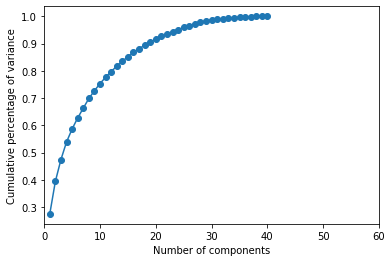

In [334]:
plt.scatter(range(1,len(X.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.plot(range(1,len(X.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 60)
plt.show()

In [335]:
np.cumsum(pca_norm.explained_variance_ratio_)[0:10]

array([0.27509786, 0.39431877, 0.47441468, 0.53878101, 0.58635996,
       0.62705074, 0.66274374, 0.69838428, 0.72667   , 0.75310811])

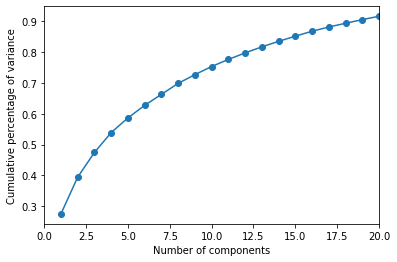

In [336]:
plt.scatter(range(1,21), np.cumsum(pca_norm.explained_variance_ratio_)[0:20])
plt.plot(range(1,21), np.cumsum(pca_norm.explained_variance_ratio_)[0:20])
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 20)
plt.show()

In [337]:
n_component = 10

pca = PCA(n_components = n_component)
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)
fit_norm = pca.fit(X_normalized)
pcs = pd.DataFrame(fit_norm.components_)

In [338]:
X_new = pd.DataFrame(pca.transform(X_normalized))

In [339]:
X_all = pd.concat([X, X_new],axis = 1)
X_all.shape


(6110, 50)

In [347]:
X_all.iloc[0:10,40:50]

,0,1,2,3,4,5,6,7,8,9
0,-1.119965,2.968480,0.518928,2.636125,-1.235353,0.586800,0.504750,2.534431,2.685198,-1.988407
1,2.488872,-3.517005,-0.017849,0.025492,1.605870,-0.531436,-0.624384,-0.170904,0.375871,-1.027753
2,-4.276450,-0.034621,0.920651,0.603091,-0.699721,0.276889,-0.358770,1.490341,-0.057994,0.065273
3,1.219903,0.565159,-1.180843,1.628337,-1.631117,1.845995,-0.449372,1.476878,-0.580492,-0.020488
4,0.063878,-0.391294,-0.991660,-1.725716,2.824877,-1.749616,-1.042161,-0.532587,-0.525642,0.319995
5,2.882692,-1.283863,-0.512631,3.114972,0.400833,-3.509996,0.769318,-0.579461,1.793507,0.177043
6,0.749836,1.832766,0.724438,-1.765989,0.044823,-0.812229,-1.463877,1.085122,1.505762,2.601276
7,-1.506246,4.951431,3.468922,2.523275,-1.310290,-1.189392,-0.948646,2.155954,-0.287782,-1.147499
8,-2.835780,-2.495944,0.183654,1.423584,2.370045,-0.680816,-0.752140,-0.866101,-0.775208,0.578184
9,-0.479793,3.043397,1.663045,0.835567,0.718333,-1.034124,0.087285,0.046230,-0.574924,-1.495074


In [348]:
corr0 = pd.DataFrame(X_all.corr().iloc[0:10,40:50].reset_index())
old_names = corr0.columns.to_list()

nums = list(range(10))
nums = [str(x) for x in nums]
new_names = ["pc" + x for x in nums]

col_dict = dict(zip(old_names, new_names))
col_dict['index'] = 'var'
corr0 = corr0.rename(columns = col_dict)

In [349]:
corr0

,var,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,9
0,gini_index,-0.010031,-0.025887,0.009481,-0.042872,-0.031170,0.015766,0.024949,-0.057075,-0.009240,-0.011250
1,year,-0.004587,-0.001110,0.140063,-0.445562,-0.265803,0.168115,0.252363,-0.355074,0.023782,-0.126558
2,renter_occupied_housing_units_paying_cash_medi...,-0.010431,0.019002,0.048642,-0.083849,-0.063179,0.032436,0.080938,-0.090635,0.000550,-0.035762
3,walked_to_work,0.035603,-0.021394,0.014412,-0.012872,-0.008404,-0.009358,0.020010,-0.028788,0.011703,-0.037963
4,employed_information,0.036393,0.010787,0.022917,-0.002973,-0.016841,0.009649,0.027538,-0.024180,0.008366,-0.016958
5,commuters_by_public_transportation,0.037926,0.000035,0.017074,0.013653,-0.018512,-0.006547,0.023035,-0.013905,0.018374,-0.011386
6,asian_male_55_64,0.049569,0.032109,-0.001743,-0.012584,-0.020450,-0.013914,0.034978,-0.021536,0.022323,-0.007760
7,black_male_45_54,0.030466,-0.000421,0.026443,0.000168,0.004539,-0.004341,-0.000660,0.012072,-0.004181,0.014879
8,female_64_over,0.060621,0.039317,0.018045,-0.061359,-0.054850,-0.008209,0.054752,-0.060821,-0.000340,-0.029882
9,hispanic_male_55_64,0.053624,0.015965,0.010513,-0.061515,-0.040562,0.000933,0.041437,-0.029469,0.010602,-0.027896


In [350]:
pc1_sorted = corr0.reindex(corr0.pc1.abs().sort_values(ascending = False).index)[['var','pc1']]

In [353]:
pc1_sorted

,var,pc1
8,female_64_over,0.060621
9,hispanic_male_55_64,0.053624
6,asian_male_55_64,0.049569
5,commuters_by_public_transportation,0.037926
4,employed_information,0.036393
3,walked_to_work,0.035603
7,black_male_45_54,0.030466
2,renter_occupied_housing_units_paying_cash_medi...,-0.010431
0,gini_index,-0.010031
1,year,-0.004587


In [352]:
pc2_sorted = corr0.reindex(corr0.pc2.abs().sort_values(ascending = False).index)[['var','pc2']]
pc2_sorted


,var,pc2
8,female_64_over,0.039317
6,asian_male_55_64,0.032109
0,gini_index,-0.025887
3,walked_to_work,-0.021394
2,renter_occupied_housing_units_paying_cash_medi...,0.019002
9,hispanic_male_55_64,0.015965
4,employed_information,0.010787
1,year,-0.001110
7,black_male_45_54,-0.000421
5,commuters_by_public_transportation,0.000035


In [219]:
pc3_sorted = corr0.reindex(corr0.pc3.abs().sort_values(ascending = False).index)[['var','pc3']]
pc3_sorted.loc[abs(pc3_sorted["pc3"]) > .02]

,var,pc3
58,employed_transportation_warehousing_utilities,-0.030054
60,employed_transportation_warehousing_utilities,-0.030054
89,income_per_capita,0.028162
59,employed_wholesale_trade,-0.028115
81,year,0.027102
0,not_us_citizen_pop,-0.026518
65,occupation_production_transportation_material,-0.026434
100,children,-0.025312
8,black_pop,-0.024903
103,one_parent_families_with_young_children,-0.024742
